In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as spio
import sklearn.preprocessing as skpp
import scipy.sparse.linalg as ll
from os.path import abspath, exists

In [2]:
#cleaning data

from numpy import genfromtxt
my_data = pd.read_csv('food-consumption.csv')
print(my_data.head(5))

del my_data['Country']
print(my_data.shape)

my_data = my_data.dropna()
print(my_data.shape)

   Country  Real coffee  Instant coffee  Tea  Sweetener  Biscuits  \
0  Germany           90              49   88       19.0      57.0   
1    Italy           82              10   60        2.0      55.0   
2   France           88              42   63        4.0      76.0   
3  Holland           96              62   98       32.0      62.0   
4  Belgium           94              38   48       11.0      74.0   

   Powder soup  Tin soup  Potatoes  Frozen fish  ...  Apples  Oranges  \
0           51        19        21           27  ...      81       75   
1           41         3         2            4  ...      67       71   
2           53        11        23           11  ...      87       84   
3           67        43         7           14  ...      83       89   
4           37        23         9           13  ...      76       76   

   Tinned fruit  Jam  Garlic  Butter  Margarine  Olive oil  Yoghurt  \
0            44   71      22      91         85         74     30.0   
1   

In [3]:
Anew=my_data.to_numpy()
m,n = Anew.shape
Anew

array([[90., 49., 88., 19., 57., 51., 19., 21., 27., 21., 81., 75., 44.,
        71., 22., 91., 85., 74., 30., 26.],
       [82., 10., 60.,  2., 55., 41.,  3.,  2.,  4.,  2., 67., 71.,  9.,
        46., 80., 66., 24., 94.,  5., 18.],
       [88., 42., 63.,  4., 76., 53., 11., 23., 11.,  5., 87., 84., 40.,
        45., 88., 94., 47., 36., 57.,  3.],
       [96., 62., 98., 32., 62., 67., 43.,  7., 14., 14., 83., 89., 61.,
        81., 15., 31., 97., 13., 53., 15.],
       [94., 38., 48., 11., 74., 37., 23.,  9., 13., 12., 76., 76., 42.,
        57., 29., 84., 80., 83., 20.,  5.],
       [97., 61., 86., 28., 79., 73., 12.,  7., 26., 23., 85., 94., 83.,
        20., 91., 94., 94., 84., 31., 24.],
       [27., 86., 99., 22., 91., 55., 76., 17., 20., 24., 76., 68., 89.,
        91., 11., 95., 94., 57., 11., 28.],
       [72., 26., 77.,  2., 22., 34.,  1.,  5., 20.,  3., 22., 51.,  8.,
        16., 89., 65., 78., 92.,  6.,  9.],
       [55., 31., 61., 15., 29., 33.,  1.,  5., 15., 11., 49., 4

In [4]:
# normalize data
stdA = np.std(Anew,axis = 0)
stdA = skpp.normalize(stdA.reshape(1,-1)) # the normalize is different from MATLAB's

Anew = Anew @ np.diag(np.ones(stdA.shape[1])/stdA[0])
Anew = Anew.T

In [5]:
# PCA
mu = np.mean(Anew,axis = 1)
xc = Anew - mu[:,None]

C = np.dot(xc,xc.T)/m

K = 2
S,W = ll.eigs(C,k = K)

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0])
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1])




/home/hadi/anaconda3/envs/StatisticalLearning/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/home/hadi/anaconda3/envs/StatisticalLearning/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


In [11]:
print(W[:,0].shape)
print(n)
print(S)

(20,)
20
[52619.58972424+0.j 26182.02252018+0.j]


/home/hadi/anaconda3/envs/StatisticalLearning/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


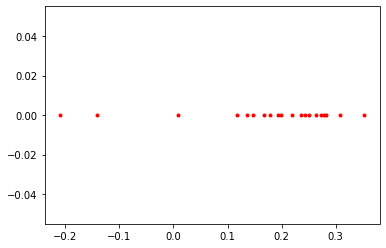

In [7]:
digit_fig = plt.figure()
y = np.zeros(n)
digit_fig.gca().plot(W[:,0],y,'r.')

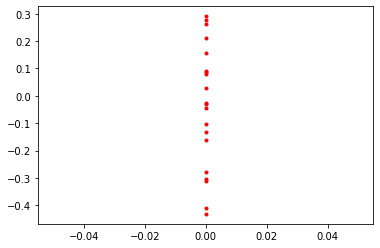

In [8]:
digit_fig = plt.figure()
x = np.zeros(n)
digit_fig.gca().plot(x,W[:,1],'r.')


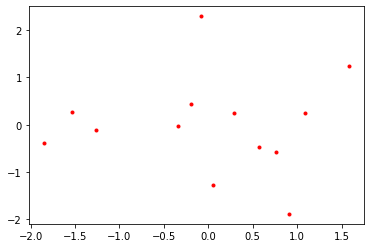

In [9]:
digit_fig = plt.figure()
digit_fig.gca().plot(dim1,dim2,'r.')